In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# set file path for csv
final_df = "final_df.csv"
# file_2 = "../Resources/imdb_rating_data.csv"

In [7]:
# read in csv file to notebook
final_df = pd.read_csv(final_df, low_memory = False)
final_df.head()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79


In [8]:
# Split up data into groups based on year released
year_group = final_df.groupby('startYear')
year_group.head()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
...,...,...,...,...,...,...,...,...
69278,161891,tt0233985,Jeffries-Johnson World's Championship Boxing C...,1910,100,"Documentary,Sport",5.7,86
76923,190624,tt0289146,Darkness,2009,100,"Horror,Mystery,Thriller",4.6,159
77266,191913,tt0291338,May Day Parade,1900,66,News,6.4,8
78831,199255,tt0304876,Live Wire,2009,81,Comedy,5.4,79


In [9]:
years = final_df['startYear'].unique()
years

array([1894, 1906, 1908, 1910, 1909, 1911, 1912, 1919, 1913, 1914, 1915,
       1936, 1925, 1916, 1917, 1918, 1920, 1921, 1924, 1923, 1922, 1927,
       1929, 1926, 1935, 1928, 1942, 1933, 1930, 1932, 1931, 1937, 1950,
       1938, 1951, 1939, 1934, 1946, 1940, 1944, 1947, 1970, 1957, 1943,
       1941, 1945, 1952, 1948, 2001, 1953, 1954, 1983, 1949, 1973, 1962,
       1958, 1955, 1956, 1961, 1964, 1960, 1959, 1967, 1963, 1968, 1965,
       1971, 1969, 1966, 1990, 1972, 1979, 1987, 1981, 1978, 2010, 1974,
       1989, 1976, 1977, 1975, 1986, 1985, 1984, 1995, 1982, 1988, 1980,
       1991, 1993, 1992, 2005, 1998, 1999, 1994, 1997, 2000, 1996, 2004,
       2002, 2006, 2008, 2007, 2003, 2009, 1904, 1899, 1900], dtype=int64)

In [10]:
# # Find number of movies in each year
no_released = year_group['primaryTitle'].count()
no_released

startYear
1894       1
1899       1
1900       1
1904       1
1906       1
        ... 
2006    3108
2007    1622
2008     684
2009     264
2010     134
Name: primaryTitle, Length: 108, dtype: int64

In [11]:
# # Find sum of ratings for each year
rating_sum = year_group['averageRating'].sum()
rating_sum

startYear
1894        5.3
1899        3.8
1900        6.4
1904        5.3
1906        6.1
         ...   
2006    19036.8
2007     9665.4
2008     3955.4
2009     1535.2
2010      783.5
Name: averageRating, Length: 108, dtype: float64

In [12]:
# # # # Find average rating of all movies in each year
avg_by_year = rating_sum / no_released
avg_by_year

startYear
1894    5.300000
1899    3.800000
1900    6.400000
1904    5.300000
1906    6.100000
          ...   
2006    6.125097
2007    5.958940
2008    5.782749
2009    5.815152
2010    5.847015
Length: 108, dtype: float64

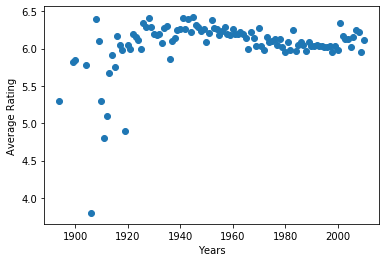

In [13]:
# Create scatter plot to compare average ratings by year
x_values = years
y_values = avg_by_year
plt.scatter(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Average Rating')
plt.show()

In [14]:
# # Create equation of line to calculate predicted movie rating based on year
# slope, int, r, p, std_err = stats.linregress(x_values, y_values)
# # Plot the linear model on top of scatter plot 
# fit = slope * x_values + int
# x_values = years
# y_values = avg_by_year
# plt.scatter(x_values,y_values)
# plt.plot(x_values,fit,"--")
# plt.xlabel('Year')
# plt.ylabel('Average Rating')
# plt.show()

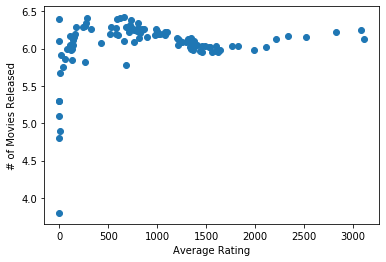

In [15]:
# Create scatter plot to compare average ratings by year
x_values = no_released
y_values = avg_by_year
plt.scatter(x_values, y_values)
plt.xlabel('Average Rating')
plt.ylabel('# of Movies Released')
plt.show()

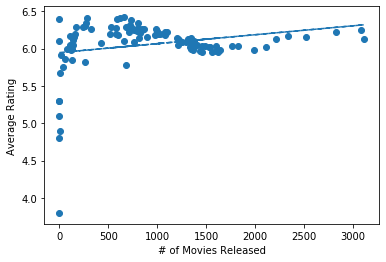

In [16]:
# Create equation of line to calculate predicted violent crime rate
no_slope, no_int, no_r, no_p, no_std_err = stats.linregress(x_values, y_values)
# Plot the linear model on top of scatter plot 
no_fit = no_slope * x_values + no_int
x_values = no_released
y_values = avg_by_year
plt.scatter(x_values,y_values)
plt.plot(x_values,no_fit,"--")
plt.xlabel('# of Movies Released')
plt.ylabel('Average Rating')
plt.show()

In [19]:
final_df['startYear'].describe()

count    100255.000000
mean       1976.427360
std          23.388476
min        1894.000000
25%        1960.000000
50%        1980.000000
75%        1997.000000
max        2010.000000
Name: startYear, dtype: float64